<a href="https://colab.research.google.com/github/SunmoKoo/research-prac/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/SunmoKoo/research-prac.git

fatal: destination path 'research-prac' already exists and is not an empty directory.


In [3]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = data_generator.flow_from_directory('research-prac/data_prac/data', target_size=(240,240), batch_size=8, class_mode='binary')
val_generator = data_generator.flow_from_directory('research-prac/data_prac/data', target_size=(240,240), batch_size=8, class_mode='binary')

Found 553 images belonging to 2 classes.
Found 553 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(240, 240, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [5]:
model.compile(loss='binary_crossentropy', optimizer = optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=16)

In [6]:
history = model.fit(train_generator, epochs=200, validation_data=val_generator, callbacks=[early_stopping_callback])

Epoch 1/200
70/70 [==============================] - 133s 2s/step - loss: 0.4025 - accuracy: 0.8716 - val_loss: 0.3367 - val_accuracy: 0.8807
Epoch 2/200
70/70 [==============================] - 105s 2s/step - loss: 0.3344 - accuracy: 0.8807 - val_loss: 0.3145 - val_accuracy: 0.8807
Epoch 3/200
70/70 [==============================] - 132s 2s/step - loss: 0.3395 - accuracy: 0.8807 - val_loss: 0.3028 - val_accuracy: 0.8807
Epoch 4/200
70/70 [==============================] - 105s 1s/step - loss: 0.3054 - accuracy: 0.8807 - val_loss: 0.3088 - val_accuracy: 0.8807
Epoch 5/200
70/70 [==============================] - 104s 1s/step - loss: 0.3112 - accuracy: 0.8807 - val_loss: 0.2806 - val_accuracy: 0.8807
Epoch 6/200
70/70 [==============================] - 107s 2s/step - loss: 0.2859 - accuracy: 0.8807 - val_loss: 0.2407 - val_accuracy: 0.8807
Epoch 7/200
70/70 [==============================] - 106s 2s/step - loss: 0.2419 - accuracy: 0.8807 - val_loss: 0.2151 - val_accuracy: 0.8807
Epoch 

<function matplotlib.pyplot.show(close=None, block=None)>

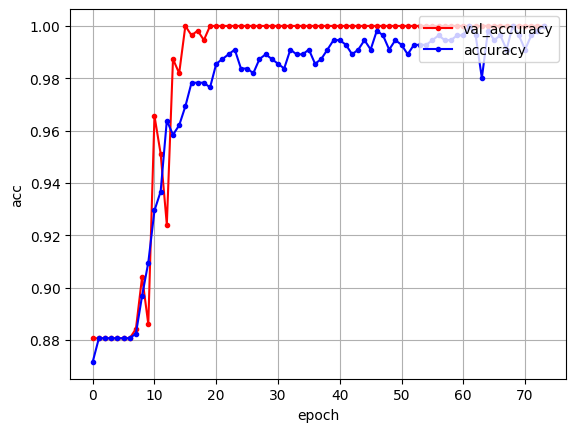

In [7]:
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vacc, marker='.', c='red', label='val_accuracy')
plt.plot(x_len, y_acc, marker='.', c='blue', label = 'accuracy')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

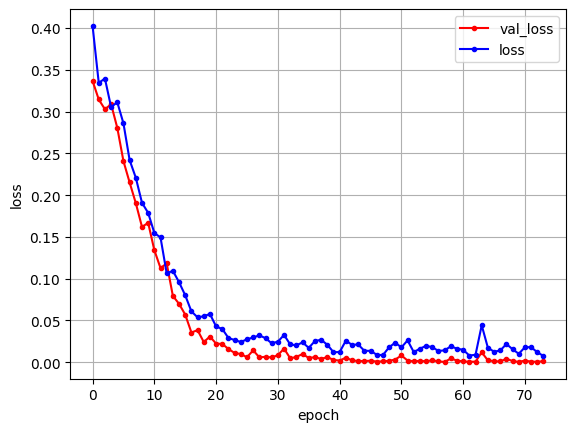

In [8]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='val_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show